## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on='Mouse ID')

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# start new summary dataframe from the merged df grouped by drug collecting the mean of the Tumor Vol
# all other columns added in similar method
regimen_tumor_stats = pd.DataFrame(merged.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']).rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})
regimen_tumor_stats['Median Tumor Volume (mm3)'] = pd.DataFrame(merged.groupby('Drug Regimen').median()['Tumor Volume (mm3)'])
regimen_tumor_stats['Tumor Volume (mm3) Variance'] = pd.DataFrame(merged.groupby('Drug Regimen').var()['Tumor Volume (mm3)'])
regimen_tumor_stats['Tumor Volume (mm3) Standard Deviation'] = pd.DataFrame(merged.groupby('Drug Regimen').std()['Tumor Volume (mm3)'])
regimen_tumor_stats['Tumor Volume (mm3) SEM'] = pd.DataFrame(merged.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'])
regimen_tumor_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

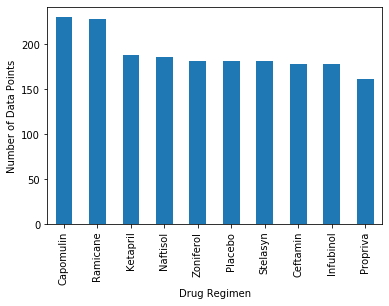

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_data = pd.DataFrame(merged.groupby('Drug Regimen')['Mouse ID'].count()).sort_values('Mouse ID',ascending=False)
drug_data.plot(kind='bar',legend=False)
plt.ylabel('Number of Data Points')
plt.show()

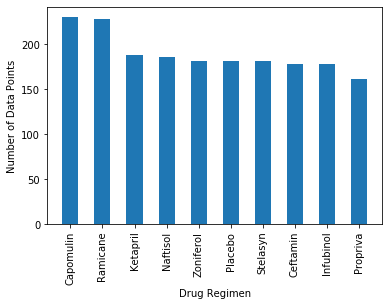

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_data = drug_data.reset_index()
plt.bar(drug_data['Drug Regimen'], drug_data['Mouse ID'],width = .5)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

## Pie plots

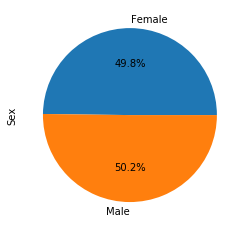

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = pd.DataFrame(merged.drop_duplicates('Mouse ID',keep='first').groupby('Sex')['Mouse ID'].count())
gender_dist.plot.pie(y='Mouse ID', legend=False,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

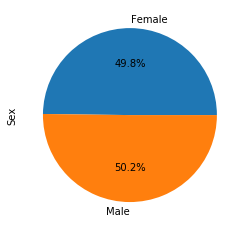

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dist = gender_dist.reset_index()
plt.pie(gender_dist['Mouse ID'],autopct='%1.1f%%',labels=gender_dist['Sex'])
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin, Ramicane, Infubinol, and Ceftamin are the four most promising treatments

# first, acquired the final timepoints data by sorting in descending order and dropping all secondary entries per mouse ID
final = merged.sort_values('Timepoint',ascending=False)
final = final.drop_duplicates('Mouse ID', keep='first')

# filtered for drug of interest to create new individualized datasets and then pulled the tumor volume data
final_cap = final.loc[final['Drug Regimen'] == 'Capomulin']
final_cap_tv = final_cap['Tumor Volume (mm3)']
# above filtered was repeated for the 3 other drugs of interest
final_ram = final.loc[final['Drug Regimen'] == 'Ramicane']
final_ram_tv = final_ram['Tumor Volume (mm3)']
final_inf = final.loc[final['Drug Regimen'] == 'Infubinol']
final_inf_tv = final_inf['Tumor Volume (mm3)']
final_cef = final.loc[final['Drug Regimen'] == 'Ceftamin']
final_cef_tv = final_cef['Tumor Volume (mm3)']

# IQR and outlier calculations for Capomulin
# first setting the quartiles and IQR and reporting
quartiles_cap = final_cap_tv.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of final tumor volume for Capomulin is: {round(lowerq_cap,2)}mm3")
print(f"The upper quartile of final tumor volume for Capomulin is: {round(upperq_cap,2)}mm3")
print(f"The interquartile range of final tumor volume for Capomulin is: {round(iqr_cap,2)}mm3")
print(f"The the median of final tumor volume for Capomulin is: {round(quartiles_cap[0.5],2)}mm3 ")

# using the previous calculations to identify outlier thresholds.
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {round(lower_bound_cap,2)}mm3 could be outliers.")
print(f"Values above {round(upper_bound_cap,2)}mm3 could be outliers.")
print('--------------------------------------------------')

# IQR and outlier calculations for Ramicane
# first setting the quartiles and IQR and reporting
quartiles_ram = final_ram_tv.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of final tumor volume for Ramicane is: {round(lowerq_ram,2)}mm3")
print(f"The upper quartile of final tumor volume for Ramicane is: {round(upperq_ram,2)}mm3")
print(f"The interquartile range of final tumor volume for Ramicane is: {round(iqr_ram,2)}mm3")
print(f"The the median of final tumor volume for Ramicane is: {round(quartiles_ram[0.5],2)}mm3 ")

# using the previous calculations to identify outlier thresholds.
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {round(lower_bound_ram,2)}mm3 could be outliers.")
print(f"Values above {round(upper_bound_ram,2)}mm3 could be outliers.")
print('--------------------------------------------------')


# IQR and outlier calculations for Infubinol
# first setting the quartiles and IQR and reporting
quartiles_inf = final_inf_tv.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of final tumor volume for Infubinol is: {round(lowerq_inf,2)}mm3")
print(f"The upper quartile of final tumor volume for Infubinol is: {round(upperq_inf,2)}mm3")
print(f"The interquartile range of final tumor volume for Infubinol is: {round(iqr_inf,2)}mm3")
print(f"The the median of final tumor volume for Infubinol is: {round(quartiles_inf[0.5],2)}mm3 ")

# using the previous calculations to identify outlier thresholds.
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {round(lower_bound_inf,2)}mm3 could be outliers.")
print(f"Values above {round(upper_bound_inf,2)}mm3 could be outliers.")
print('--------------------------------------------------')

# IQR and outlier calculations for Ceftamin
# first setting the quartiles and IQR and reporting
quartiles_cef = final_cef_tv.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

print(f"The lower quartile of final tumor volume for Ceftamin is: {round(lowerq_cef,2)}mm3")
print(f"The upper quartile of final tumor volume for Ceftamin is: {round(upperq_cef,2)}mm3")
print(f"The interquartile range of final tumor volume for Ceftamin is: {round(iqr_cef,2)}mm3")
print(f"The the median of final tumor volume for Ceftamin is: {round(quartiles_cef[0.5],2)}mm3 ")

# using the previous calculations to identify outlier thresholds.
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {round(lower_bound_cef,2)}mm3 could be outliers.")
print(f"Values above {round(upper_bound_cef,2)}mm3 could be outliers.")

The lower quartile of final tumor volume for Capomulin is: 32.38mm3
The upper quartile of final tumor volume for Capomulin is: 40.16mm3
The interquartile range of final tumor volume for Capomulin is: 7.78mm3
The the median of final tumor volume for Capomulin is: 38.13mm3 
Values below 20.7mm3 could be outliers.
Values above 51.83mm3 could be outliers.
--------------------------------------------------
The lower quartile of final tumor volume for Ramicane is: 31.56mm3
The upper quartile of final tumor volume for Ramicane is: 40.66mm3
The interquartile range of final tumor volume for Ramicane is: 9.1mm3
The the median of final tumor volume for Ramicane is: 36.56mm3 
Values below 17.91mm3 could be outliers.
Values above 54.31mm3 could be outliers.
--------------------------------------------------
The lower quartile of final tumor volume for Infubinol is: 54.05mm3
The upper quartile of final tumor volume for Infubinol is: 65.53mm3
The interquartile range of final tumor volume for Infubino

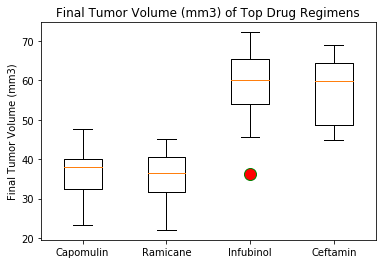

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin all in same plot window
final_all = [final_cap_tv,final_ram_tv,final_inf_tv,final_cef_tv]
fig,ax = plt.subplots()
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,linestyle='none', markeredgecolor='g')
ax.boxplot(final_all,flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume (mm3) of Top Drug Regimens')
plt.show()

## Line and scatter plots

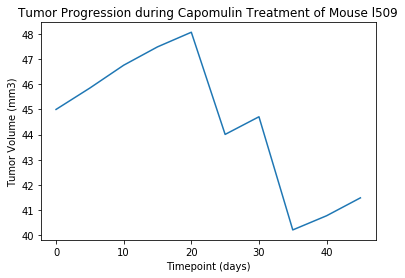

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# First selected only one mouse ID
l509 = merged.loc[merged['Mouse ID']=='l509']
plt.plot(l509['Timepoint'],l509['Tumor Volume (mm3)'])
plt.title('Tumor Progression during Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

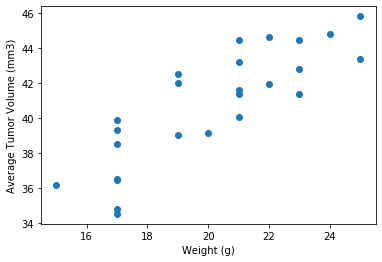

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# First filtered by Capomulin
capomulin = merged.loc[merged['Drug Regimen']=='Capomulin']
# Found the average Tumor Vol for each mouse within the capomulin data
cap_avg = pd.DataFrame(capomulin.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
# Because weight is part of the metadata it does not change and the mean function can effectively pull the weight entry using the same code as collecting average tumor vol
cap_avg['Weight'] = pd.DataFrame(capomulin.groupby('Mouse ID').mean()['Weight (g)'])
# Generation of scatter plot
plt.scatter(cap_avg['Weight'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


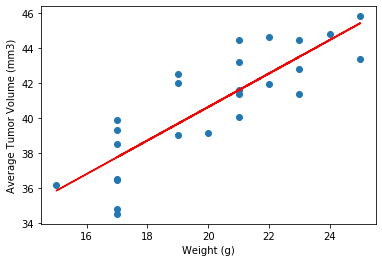

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Assign x and y values as variables for easier calling
x_values = cap_avg['Weight']
y_values = cap_avg['Tumor Volume (mm3)']

# Pulled linregress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# Calculate regress values for every point in x_value set
regress_values = x_values * slope + intercept
# Generate scatter plot
plt.scatter(x_values,y_values)
# Generate regression line
plt.plot(x_values,regress_values,"r-")
# Apply labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# Print correlation value.
print(f"The correlation between mouse weight and average tumor volume is {round(rvalue,2)}")
plt.show()